# Data Mining Project - Olist Store

##### Introduction to datasets:
Our group focuses on a Brazilian ecommerce online sale platform -- Olist Store's public datasets, which include a dataset of orders and a dataset of marketing funnel. The orders dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates. The marketing funnel dataset from sellers is filled-in requests of contact to sell their products on Olist Store. The dataset has information of 8k Marketing Qualified Leads (MQLs) that requested contact between Jun. 1st 2017 and Jun 1st 2018. They were randomly sampled from the total of MQLs. Its features allows viewing a sales process from multiple dimensions: lead category, catalog size, behaviour profile, etc.

##### The datasets contain 11 csv files:
'olist_customers_dataset.csv','olist_geolocation_dataset.csv','olist_order_items_dataset.csv','olist_order_payments_dataset.csv'
'olist_order_reviews_dataset.csv','olist_orders_dataset.csv','olist_products_dataset.csv','olist_sellers_dataset.csv'
'olist_closed_deals_dataset.csv','olist_marketing_qualified_leads_dataset.csv','product_category_name_translation.csv'

##### Data Schemas:
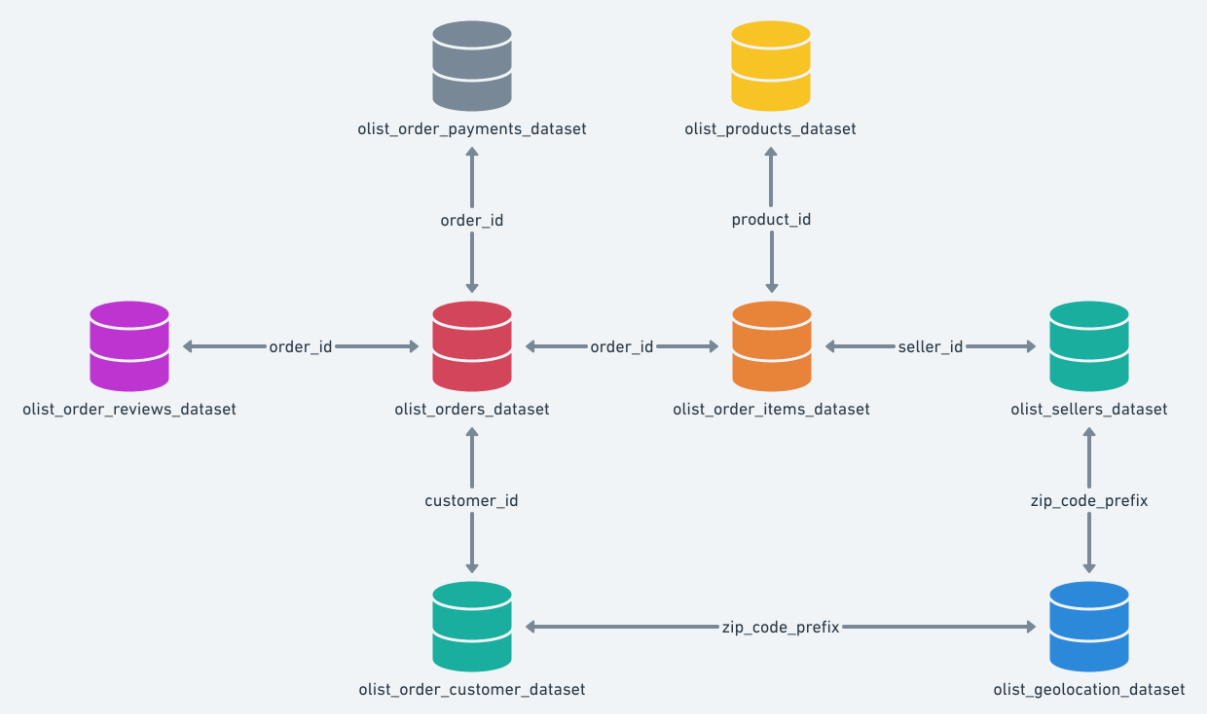
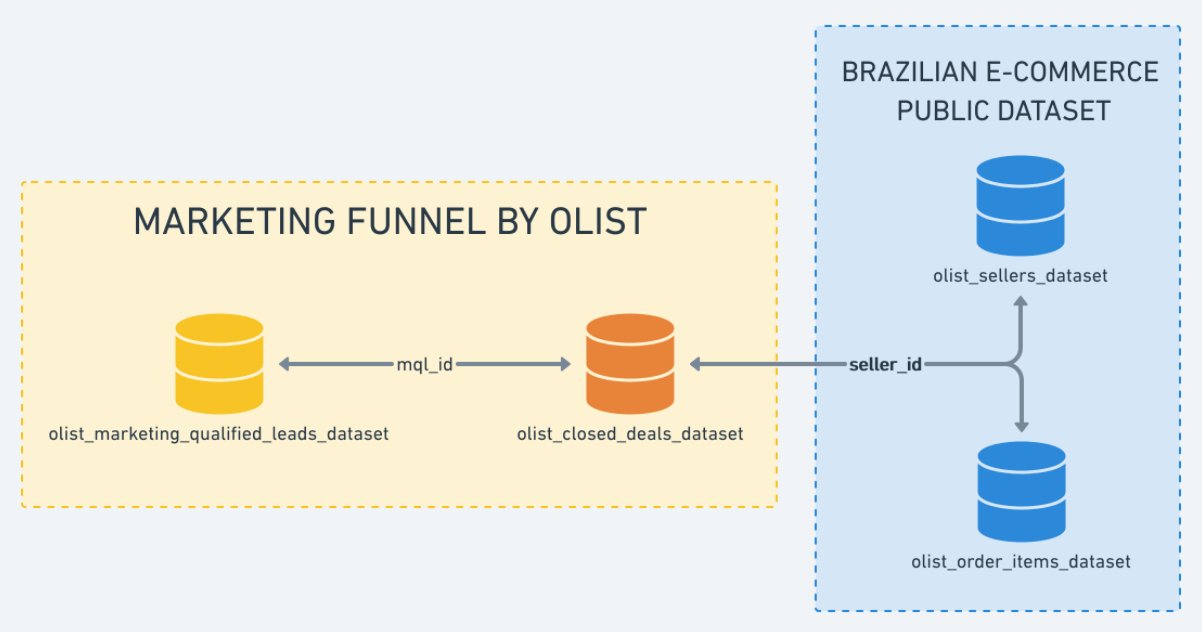
##### Project purpose:
1. To help this ecommerce platform look into details of its datasets, figure out how their customers and sellers distributed, how the SDRs, and SRs performed, which business segments, product categories, sellers generated most revenue. Based on all those information, what kinds of marketing or advertising strategies should they take to improve the performance. 
2. Using clustering algorithms to help the company better understand customers segmentation by providing two methods of segmentation(PCA and RFM),based on the segmentation, the e-commerce company could provide some recommendation to different group in the future and generate different marketing strategies for each group.
3. Predicting on revenues and review score:
By doing the revenue prediction to help sellers know better on their future performance...
Using ML model to predict review score to find out whether a customer liked/disliked a product so that olist can recommend more similar products that under same category as the products customers have rated in a high score.
4. Analyzing customers comments by using NLP, to grab the key information that customers care about, and help sellers think about how to improve the general review score.

##### Group Members:

Group members:
Coco Deng, George Bi, Mengwei Li, Mingjun Zhou, Sahil Sachdev, Yue Sun, Zhenli Min

##### Roles:

EDA: Mengwei Li

Unsupervised Learning: Zhenli Min, Coco Deng

Supervised Learning: 

Mingjun Zhou: Review score prediction

Sahil Sachdev & Yue Sun: Revenue prediction

They both did a revenue prediction, but in different sides. 

Yue predicted the sale revenue of each seller, Sahil predicted the revenue(profits) each customer could generated in the future. Each of them did a great job. Yue got a good result of his model. Sahil didn't got a good one, but the reason for that is the data limitation and the complexity of the model.

NLP: George Bi

##### References:
https://www.kaggle.com/olistbr/brazilian-ecommerce

https://www.kaggle.com/olistbr/marketing-funnel-olist/home

https://www.tableau.com/learn/articles/marketing-qualified-lead

https://www.kaggle.com/jungjoonlee/eda-with-ecommerce-marketplace-seller-side

# Part 1: EDA

## 1.1 Load the data
In this EDA part, we are trying to understand each dataset and generating some first thoughts about every table.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid',{'grid.linestyle':'--'})
%matplotlib inline
from matplotlib.gridspec import GridSpec

In [2]:
## read data
customer = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
closed_deals = pd.read_csv('olist_closed_deals_dataset.csv',parse_dates=['won_date'])
mql = pd.read_csv('olist_marketing_qualified_leads_dataset.csv',parse_dates=['first_contact_date'])
product_category_trans = pd.read_csv('product_category_name_translation.csv')

## 1.2 Exploratory Data Analysis

### 1.2.1 Customer:
This table contains customers id and their location information.

-customer_id: Key to the orders dataset. Each order has a unique customer_id

-customer_unique_id: Unique identifier of a customer

-Customer location information: zip code, city and state


In [3]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customer.rename(columns = {'customer_zip_code_prefix':'zip_code'}, inplace = True)

In [5]:
geolocation.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


In [6]:
geolocation.rename(columns = {'geolocation_zip_code_prefix':'zip_code'}, inplace = True)

Look at the customer geolocation distribution by merging customer and geolocation tables

In [7]:
cus_geo = customer.merge(geolocation, how = 'left', on = 'zip_code')

In [8]:
#Top 10 customer states and cities with their value counts
top10_cus_state = pd.DataFrame(customer.customer_state.value_counts().sort_values(ascending=False)[:10])
top10_cus_city = pd.DataFrame(customer.customer_city.value_counts().sort_values(ascending=False)[:10])

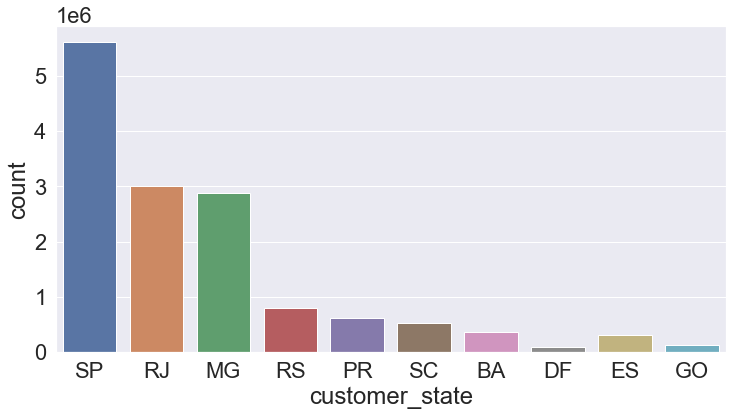

In [9]:
sns.set(font_scale = 2)
plt.figure(figsize = (12,6))
sns.countplot(x = 'customer_state', data = cus_geo,order = top10_cus_state.index)
plt.show()

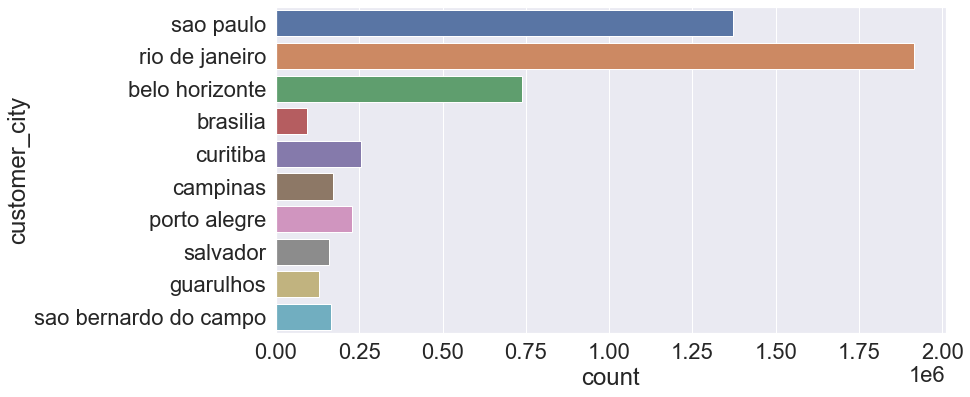

In [66]:
sns.set(font_scale = 2)
plt.figure(figsize = (12,6))
sns.countplot(y = 'customer_city', data = cus_geo,order = top10_cus_city.index)
plt.show()

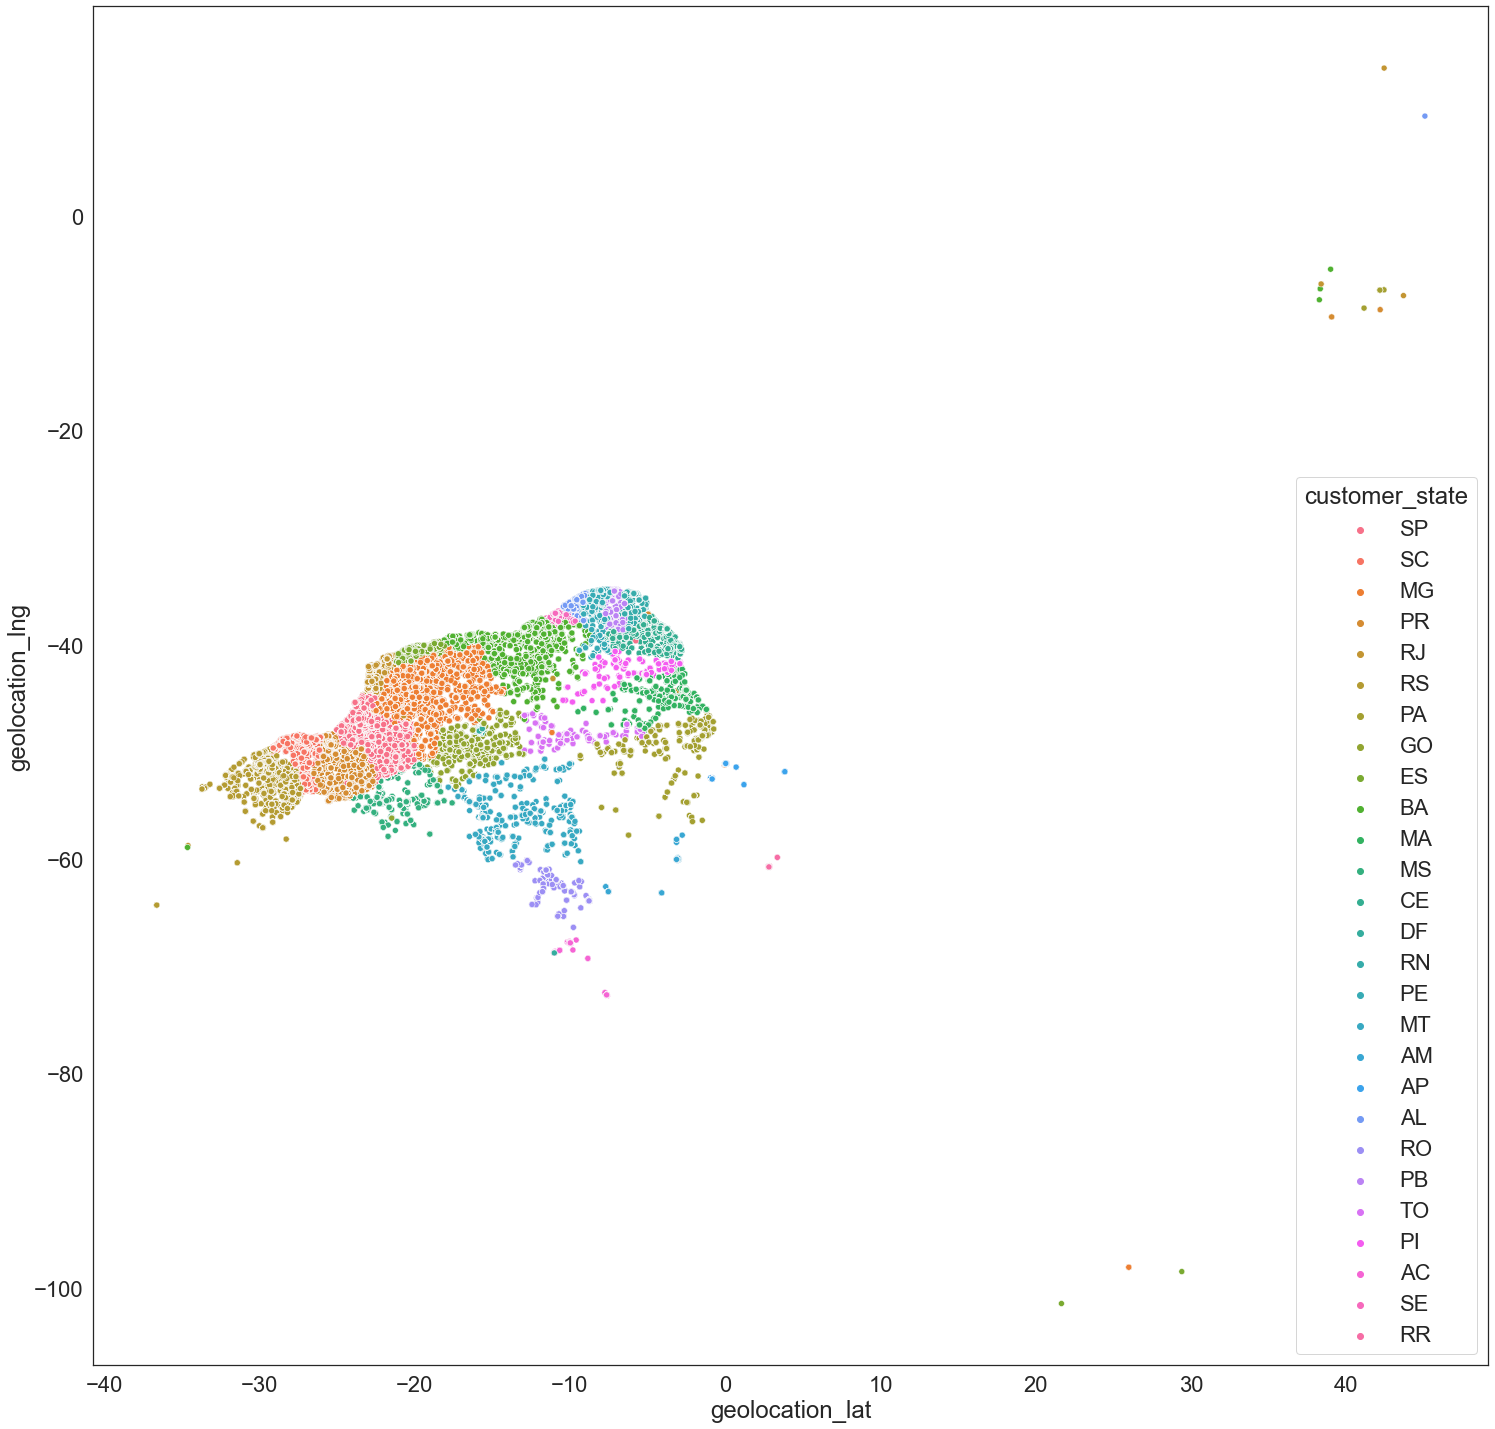

In [37]:
#visualing the neighbourhood
plt.figure(figsize=(25,25))
sns.set_style('white')
customPalette = ['#800000', '#e6194B', '#f58231', '#ffe119', '#3cb44b', '#42d4f4', '#911eb4', '#000000', '#000075', '#444444']
sns.scatterplot(x=cus_geo['geolocation_lat'], y=cus_geo['geolocation_lng'],hue=cus_geo.customer_state, palette=sns.set_palette(customPalette))
plt.show()

### 1.2.2 Sellers

In [10]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
sellers.rename(columns = {'seller_zip_code_prefix':'zip_code'}, inplace = True)

In [12]:
sel_geo = sellers.merge(geolocation, how = 'left', on = 'zip_code')

In [13]:
#Top 10 seller states and cities with their value counts
top10_sel_state = pd.DataFrame(sellers.seller_state.value_counts().sort_values(ascending=False)[:10])
top10_sel_city = pd.DataFrame(sellers.seller_city.value_counts().sort_values(ascending=False)[:10])

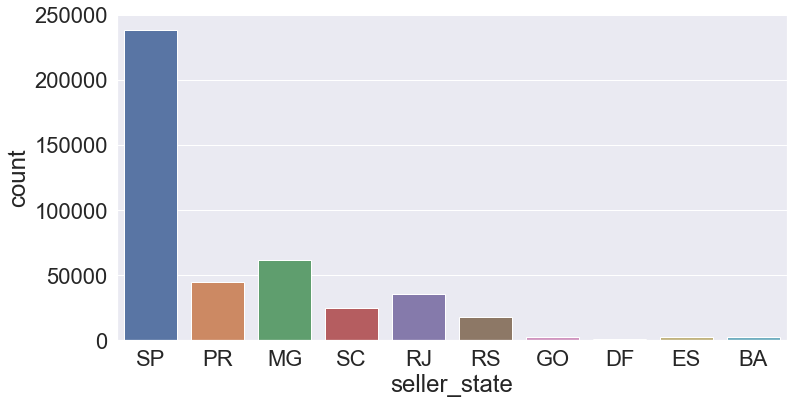

In [14]:
sns.set(font_scale = 2)
plt.figure(figsize = (12,6))
sns.countplot(x = 'seller_state', data = sel_geo,order = top10_sel_state.index)
plt.show()

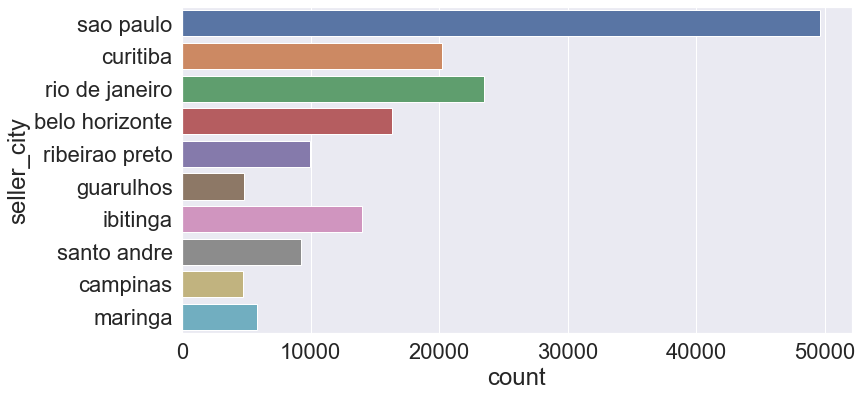

In [65]:
sns.set(font_scale = 2)
plt.figure(figsize = (12,6))
sns.countplot(y = 'seller_city', data = sel_geo,order = top10_sel_city.index)
plt.show()

Notes:
As the largest state, Sao Paulo have a much higher number of customers and sellers than the other states. City Sao Paulo and Rio De Janeriro have the most number of sellers and customers respectively. The number of customer and seller could reflect the economic condition of those places. Olist store may need to know which state and city they already got enough customers and sellers, and find out the places that have a good performance on economics, but haven't open their market to Olist.

### 1.2.3 Items

In [15]:
items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [79]:
items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [80]:
print('Number of sellers :',items.seller_id.unique().shape[0])
print('Number of unique products are : ',items.product_id.unique().shape[0])

Number of sellers : 3095
Number of unique products are :  32951


In [81]:
items.price.describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

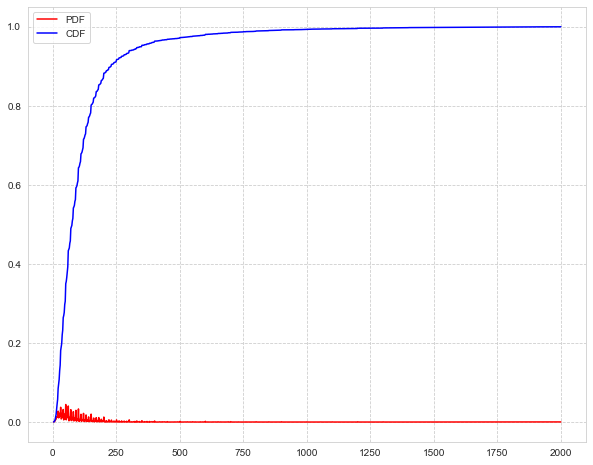

In [82]:
#temporararily removing few outliers that can reduce the smoothness of the pdf and cdf
sata = items[items.price <= 2000]
counts, bin_edges = np.histogram(sata.price, bins=1000, 
                                density = True)
#Compute pdf
pdf = counts/(sum(counts))

#compute CDF
cdf = np.cumsum(pdf)
plt.figure(figsize=(10,8))
plt.plot(bin_edges[1:],pdf,color='red',label='PDF')
plt.plot(bin_edges[1:], cdf,color='blue',label='CDF')
plt.legend()
plt.show()

## This plot shows most of the products' price are below 250

In [111]:
items.freight_value.describe()

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

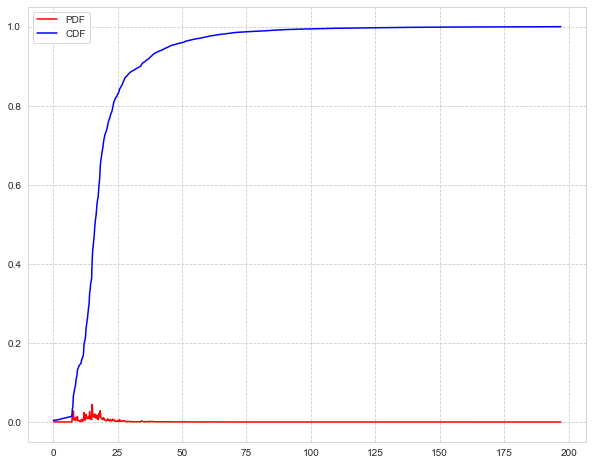

In [113]:
#temporararily removing few outliers that can reduce the smoothness of the pdf and cdf
#len(sata) = 112580, the len(items) = 112650
sata = items[items.freight_value <= 200]
counts, bin_edges = np.histogram(sata.freight_value, bins=1000, 
                                density = True)
#Compute pdf
pdf = counts/(sum(counts))

#compute CDF
cdf = np.cumsum(pdf)
plt.figure(figsize=(10,8))
plt.plot(bin_edges[1:],pdf,color='red',label='PDF')
plt.plot(bin_edges[1:], cdf,color='blue',label='CDF')
plt.legend()
plt.show()

#here we can see that over 80% of items, their freight value is lower than 25

In [43]:
orders_items = orders.merge(items, how = 'left', on = 'order_id')

In [44]:
# Filtering data between 201701 and 201808
df_orders_filt = orders_items[(orders_items['order_purchase_year_month'].astype(int) >= 201701)]
df_orders_filt = df_orders_filt[(df_orders_filt['order_purchase_year_month'].astype(int) <= 201808)]

In [45]:
df_orders_filt.order_purchase_year_month

0         201710
1         201807
2         201808
3         201711
4         201802
           ...  
113420    201802
113421    201708
113422    201801
113423    201801
113424    201803
Name: order_purchase_year_month, Length: 113018, dtype: object

In [46]:
# Grouping data
df_month_aggreg = df_orders_filt.groupby(by=['order_purchase_year', 'order_purchase_year_month'], as_index=False)
df_month_aggreg = df_month_aggreg.agg({
    'order_id': 'count',
    'price': 'sum',
    'freight_value': 'sum'
})

# Adding new columns for analysis
df_month_aggreg['price_per_order'] = df_month_aggreg['price'] / df_month_aggreg['order_id']
df_month_aggreg['freight_per_order'] = df_month_aggreg['freight_value'] / df_month_aggreg['order_id']
df_month_aggreg.head()

,order_purchase_year,order_purchase_year_month,order_id,price,freight_value,price_per_order,freight_per_order
0,2017,201701,966,120312.87,16875.62,124.547484,17.469586
1,2017,201702,1998,247303.02,38977.60,123.775285,19.508308
2,2017,201703,3041,374344.30,57704.29,123.099079,18.975432
3,2017,201704,2697,359927.23,52495.01,133.454664,19.464223
4,2017,201705,4176,506071.14,80119.81,121.185618,19.185778


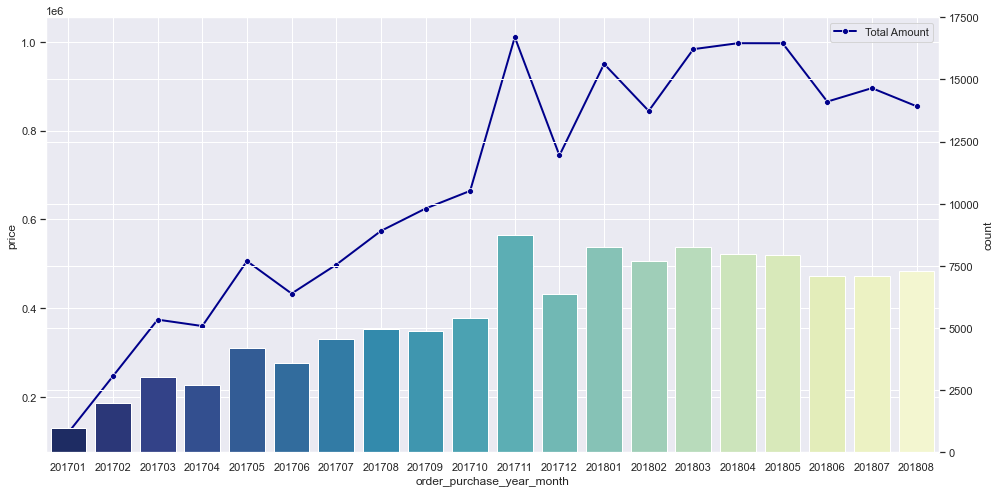

In [47]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot()
#Total orders in months
sns.lineplot(x = 'order_purchase_year_month',y = 'price', ax=ax1, data = df_month_aggreg, linewidth = 2,
            color = 'darkblue',marker = 'o',label = 'Total Amount')
ax1_twx = ax1.twinx()
order = df_month_aggreg.order_purchase_year_month
sns.countplot(data = df_orders_filt, x = 'order_purchase_year_month', ax = ax1_twx,order = order,palette = 'YlGnBu_r')
ax1_twx.set_yticks(np.arange(0, 20000, 2500))
plt.show()

Notes: 
E-commerce on Brazil really has a growing trend along the time. We can see some seasonality with peaks at specific months, and actually,  at the end of 2017, the sale reached the  highest value sold on history which turns out to be the black friday! And  in general we can see clear that customers are more prone to buy things online than before.

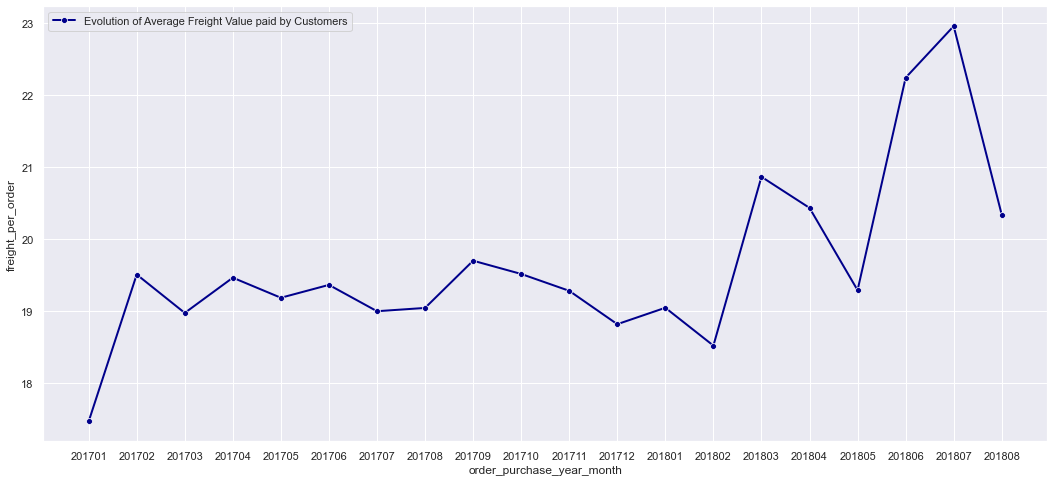

In [48]:
plt.figure(figsize = (18,8))
sns.lineplot(data = df_month_aggreg, x = 'order_purchase_year_month', y = 'freight_per_order',
             linewidth = 2, color = 'darkblue',marker = 'o',label = 'Evolution of Average Freight Value paid by Customers')
plt.show()

Notes: in the long term, the avg freight value is slowly increasing. But we also observed there are few months, like 201802-201803, the freight surged from 18.5 to 21, 201805-201806, the value went up from 19.2 to 22.2., And then there is a sharly decrease. Olist store may need to look at the reasons that lead to the freight inceasing and decreasing.

### 1.2.4 Orders

In [18]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [19]:
orders = orders.merge(customer, how='left', on='customer_id')

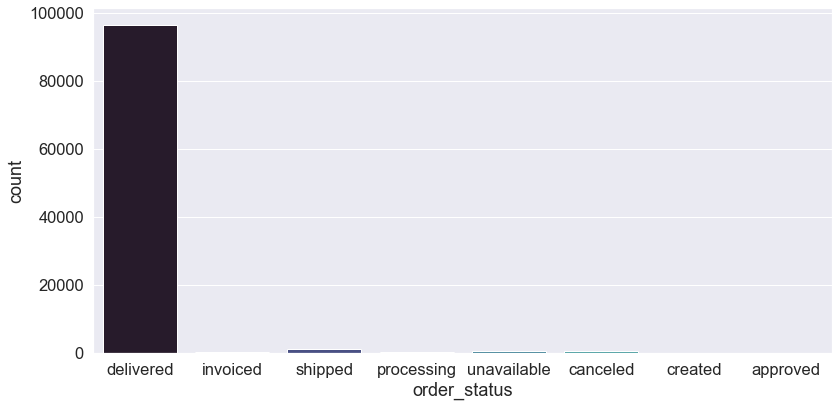

In [20]:
sns.set(font_scale = 1.5)
plt.figure(figsize = (12,6))
sns.countplot(data = orders, x = 'order_status', palette = 'mako' )
plt.tight_layout()
plt.show()
#delivered 97%

Notes:

Look into the order status, we can see that over 97% of orders are delivered.

Through orders table, we can plot the volume change in terms of purchased orders using timestamp

In [21]:
# Changing the data type for date columns
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                  'order_estimated_delivery_date']
for col in timestamp_cols:
    orders[col] = pd.to_datetime(orders[col])

In [22]:
# Extracting attributes for purchase date - Year and Month
orders['order_purchase_year'] = orders['order_purchase_timestamp'].apply(lambda x: x.year)
orders['order_purchase_month'] = orders['order_purchase_timestamp'].apply(lambda x: x.month)
orders['order_purchase_month_name'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
orders['order_purchase_year_month'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
orders['order_purchase_date'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

In [23]:
# Extracting attributes for purchase date - Day and Day of Week
orders['order_purchase_day'] = orders['order_purchase_timestamp'].apply(lambda x: x.day)
orders['order_purchase_dayofweek'] = orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
orders['order_purchase_dayofweek_name'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

In [24]:
# Extracting attributes for purchase date - Hour and Time of the Day
orders['order_purchase_hour'] = orders['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
orders['order_purchase_time_day'] = pd.cut(orders['order_purchase_hour'], hours_bins, labels=hours_labels)

In [25]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,zip_code,...,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017,10,Oct,201710,20171002,2,0,Mon,10,Morning
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,2018,7,Jul,201807,20180724,24,1,Tue,20,Night
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,2018,8,Aug,201808,20180808,8,2,Wed,8,Morning


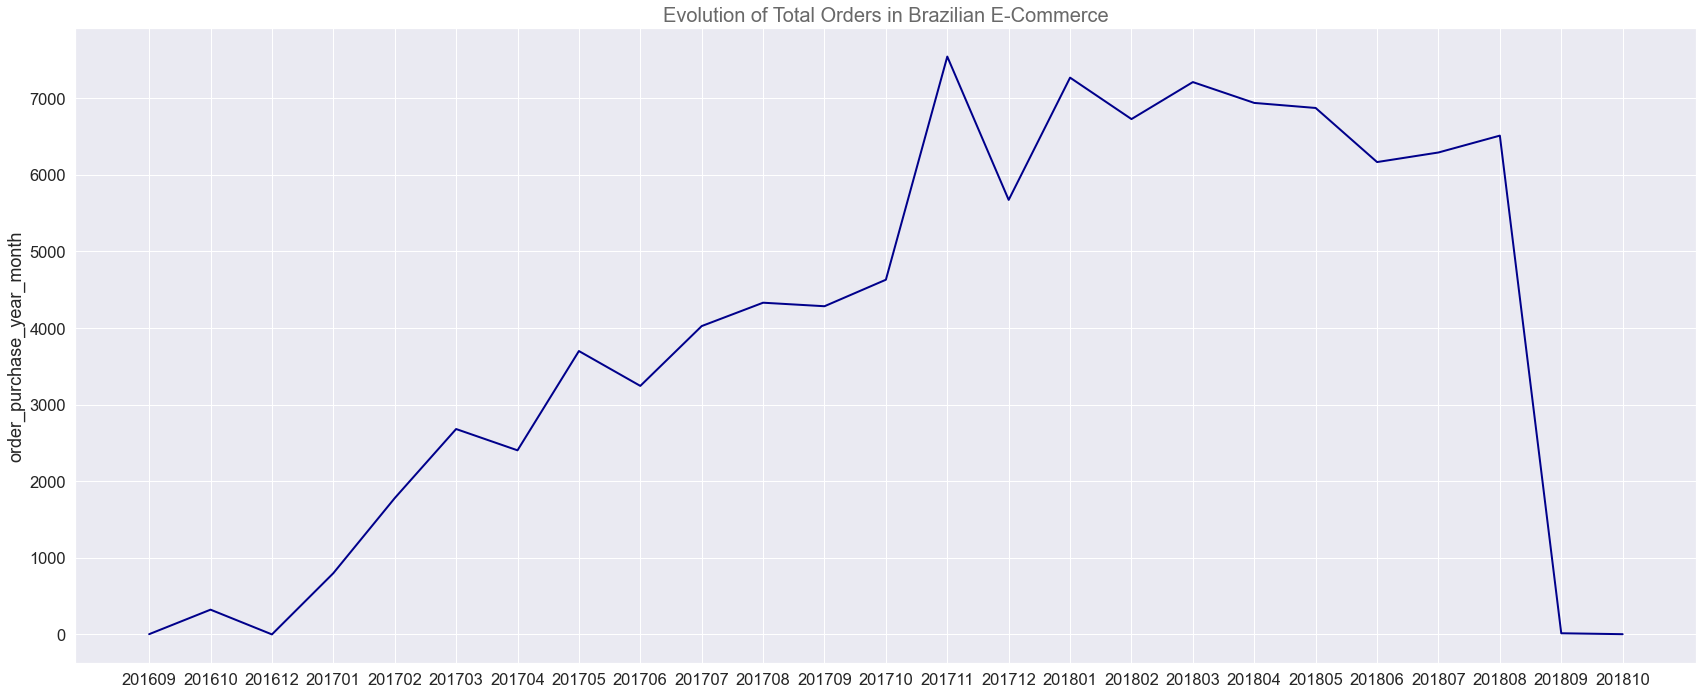

In [26]:
sns.set(font_scale = 1.5)
plt.figure(figsize = (24,10))
sns.lineplot(data = orders['order_purchase_year_month'].value_counts().sort_index(), color = 'darkblue', linewidth = 2 )
plt.title('Evolution of Total Orders in Brazilian E-Commerce', size=20, color='dimgrey')
plt.tight_layout()
plt.show()

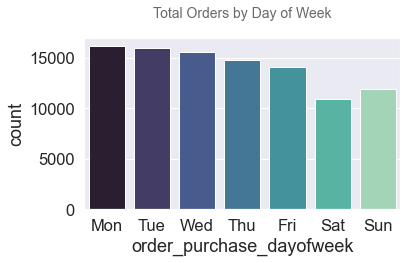

In [27]:
sns.set(font_scale = 1.5)
fig,ax = plt.subplots()
fig.figsize = (12,8)
sns.countplot(data = orders, x = 'order_purchase_dayofweek', palette = 'mako' )
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax.set_xticklabels(weekday_label)
plt.title('Total Orders by Day of Week', size=14, color='dimgrey', pad=20)
plt.tight_layout()
plt.show()

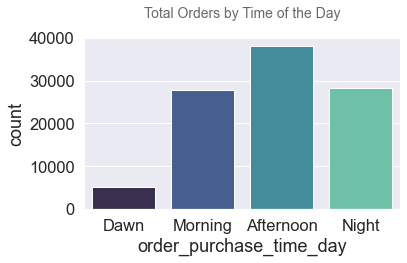

In [28]:
sns.set(font_scale = 1.5)
fig,ax = plt.subplots()
fig.figsize = (12,8)
sns.countplot(data = orders, x = 'order_purchase_time_day', palette = 'mako' )
plt.title('Total Orders by Time of the Day', size=14, color='dimgrey', pad=20)
plt.tight_layout()
plt.show()

Notes: 
Monday are the prefered day for brazilian's customers and they tend to buy more at afternoons. 

People seems to like cheering themselves up at the beginning of weekday and the end of a workday. Buying new things can reduce their pressure and brings happiness.

### 1.2.5 Payments

In [29]:
payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [30]:
orders_pay = orders.merge(payments, how = 'left', on = 'order_id')

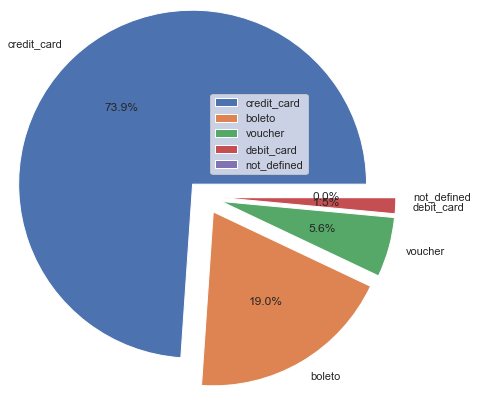

In [31]:
#Most used Payment method for orders
sns.set(font_scale = 1)
explode = [0.2]*5
label_names = orders_pay['payment_type'].value_counts().index
orders_pay.payment_type.value_counts().plot(kind='pie',radius=2,labels=label_names,autopct='%.1f%%',explode=explode)
plt.legend()
plt.show()

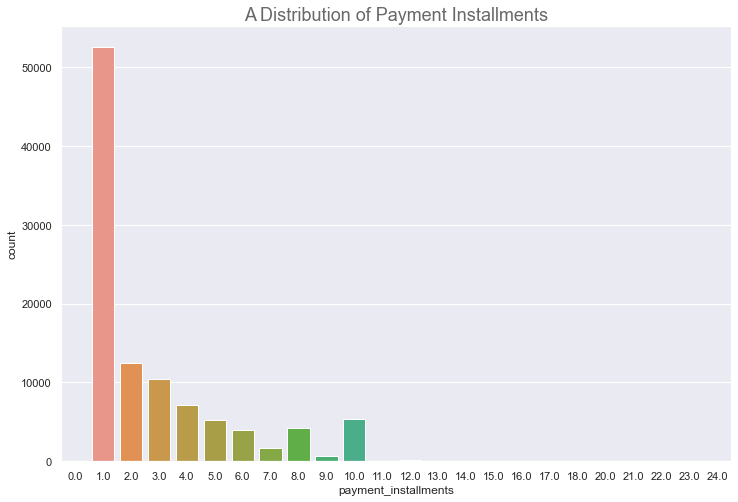

In [32]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot()
sns.countplot(data = orders_pay,x = 'payment_installments', ax = ax1)
ax1.set_title('A Distribution of Payment Installments',color = 'dimgray',size =18)
plt.show()

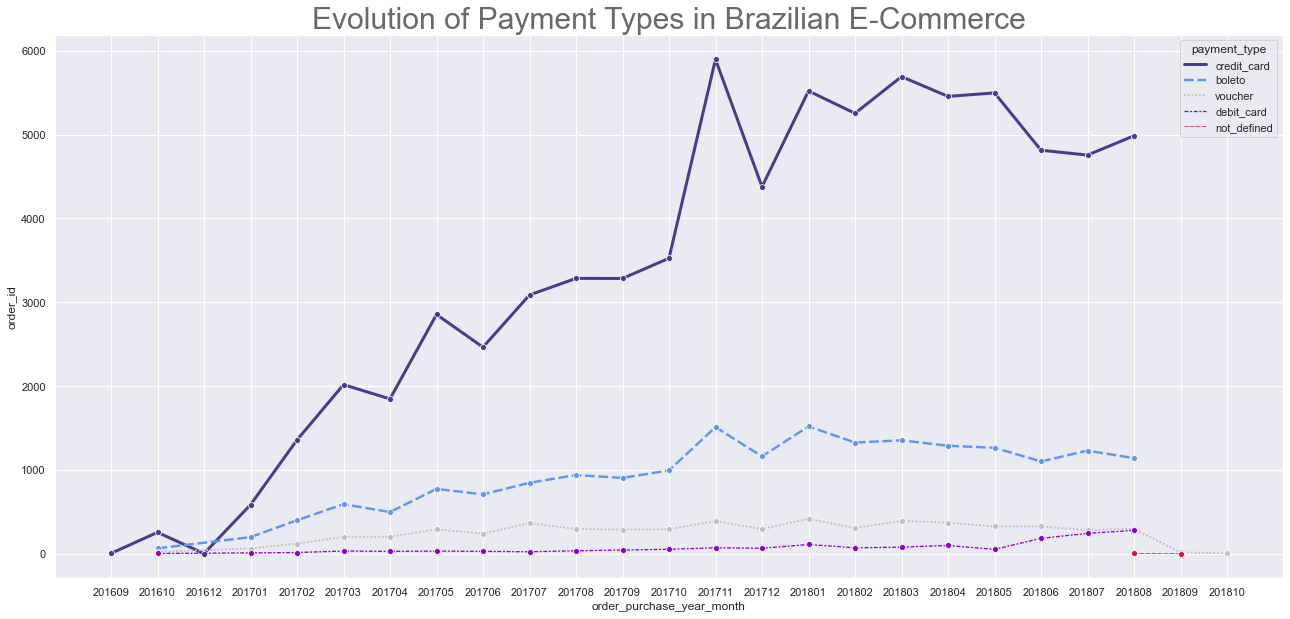

In [33]:
fig = plt.figure(figsize = (22,10))
ax = fig.add_subplot()

colors = ['darkslateblue', 'cornflowerblue', 'silver', 'darkviolet', 'crimson']

#plot payment types evolution in terms of time
payment_evl = orders_pay.groupby(by=['order_purchase_year_month', 'payment_type'], as_index=False).count()
payment_evl = payment_evl.loc[:, ['order_purchase_year_month', 'payment_type', 'order_id']]
payment_evl = payment_evl.sort_values(by=['order_purchase_year_month', 'order_id'], ascending=[True, False])
sns.lineplot(x='order_purchase_year_month', y='order_id', data=payment_evl, ax=ax, hue='payment_type',
             style='payment_type', size='payment_type', palette=colors, marker='o')

ax.set_title('Evolution of Payment Types in Brazilian E-Commerce', size=30, color='dimgrey')
plt.show()

Notes: 

We can see by the line chart that payments made by credit card really took majority place on brazilian e-commerce. Besides that, since march 2018 it's possible to see a little decrease on this type of payment. By the other side, payments made by debit card is showing a growing trend since May 2018, which is a good opportunity for investor to improve services for payments like this.

On the bar chart, we can see how brazilian customers prefer to pay the orders: mostly of them pay once into 1 installment and it's worth to point out the quantity of payments done by 10 installments.


### 1.2.6 Products

In [34]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [36]:
#it seems some columns name have spelling mistakes: length -> lenght, so we are going to rename them
products.rename(columns = {'product_name_lenght':'product_name_length',
                       'product_description_lenght':'product_description_length'},inplace=True)

Text(0.5, 0, 'product_description_length')

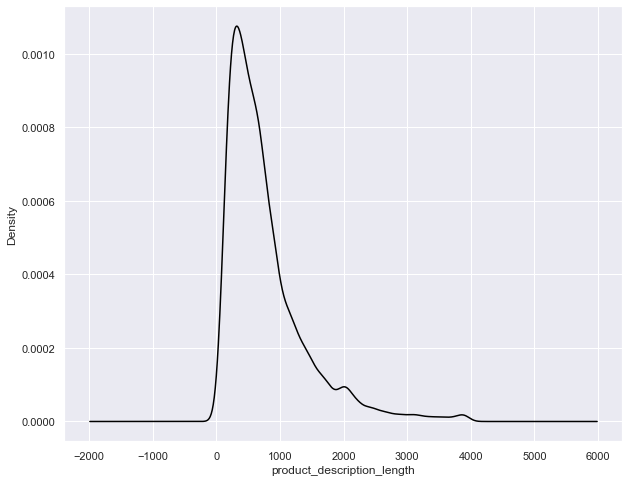

In [37]:
#Density plot of product_description_length 
products.product_description_length.plot(kind='density',figsize=(10,8),color= 'black')
plt.xlabel('product_description_length')

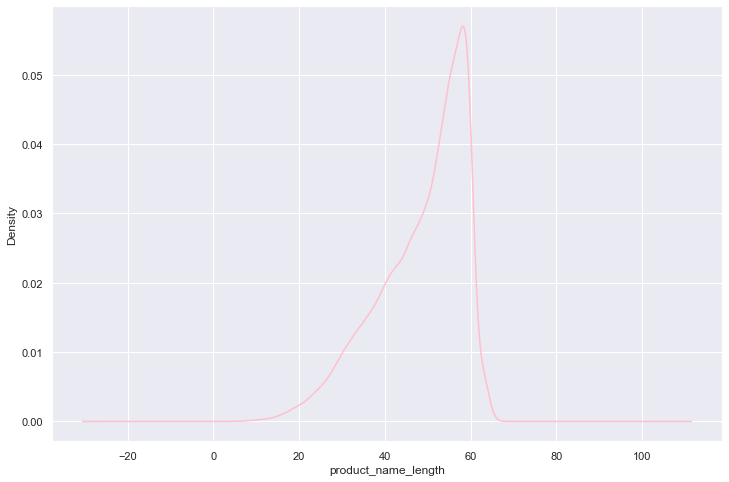

In [38]:
#Density plot of product_description_length
products.product_name_length.plot(kind='kde',figsize=(12,8),color= 'pink')
plt.xlabel('product_name_length')
plt.show()

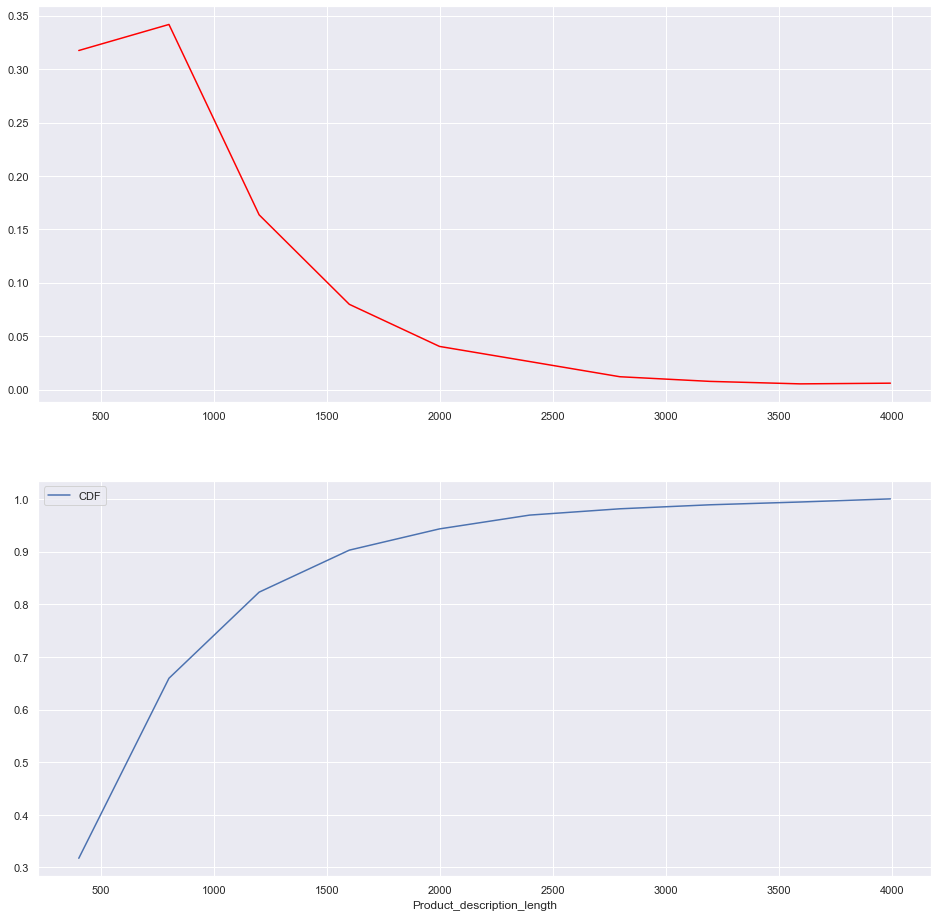

In [39]:
counts, bin_edges = np.histogram(products.product_description_length.dropna(), bins=10, 
                                 density = True)
fig,ax = plt.subplots(2,figsize=(16,16))
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
ax[0].plot(bin_edges[1:],pdf,color='red',label='PDF')
ax[1].plot(bin_edges[1:], cdf,color= 'b',label="CDF")
plt.xlabel('Product_description_length')
plt.legend()
plt.show()
# Most of the product description length is shorter than 1500

### 1.2.7 Reviews

In [40]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


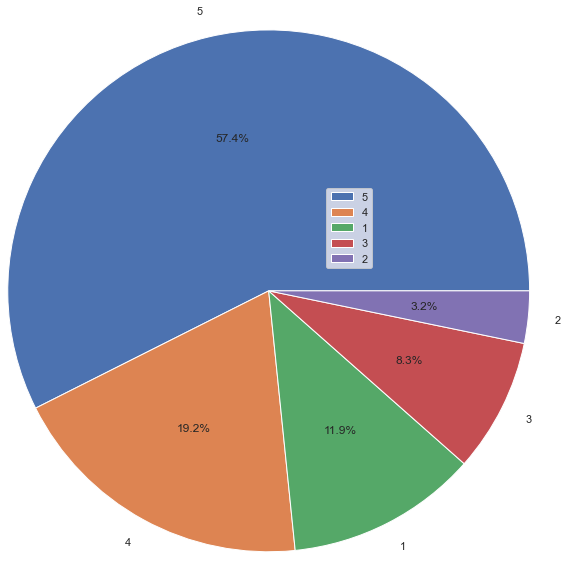

In [41]:
#pie chart for review_score
reviews.review_score.value_counts().plot(kind = 'pie',radius=3,autopct='%.1f%%')
plt.legend()
plt.show()

In [96]:
#to see the missing values
reviews.isnull().sum()
#so we have huge part of comments missing, but we also don't need these two columns when we do prediction. and we will extract them to do nlp.

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

### 1.2.8 MQL: marketing qualified leads
A Marketing Qualified Lead (MQL) is a lead who has indicated interest in what a brand has to offer based on marketing efforts or is otherwise more likely to become a customer than other leads. Often an MQL is a lead who has intentionally engaged with your brand by performing actions like voluntarily submitting contact information, opting into a program, adding e-commerce items to a shopping cart, downloading materials, or repeatedly visiting a website.
Marketing Qualified Leads have shown interest in buying. They’re open to the idea of a sale and have taken an initial step to engage with your business, without buying. While marketing efforts can bring leads in, the lead’s behavior is what prompts marketers to consider them an MQL. They make some sort of active contact action to peruse what you have to offer.

In [136]:
print(mql.shape)
mql.head(10)

(8000, 4)


,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search
5,28bdfd5f057764b54c38770f95c69f2f,2018-01-14,22c29808c4f815213303f8933030604c,organic_search
6,126a0d10becbaafcb2e72ce6848cf32c,2018-05-15,6a110e795dd487f1cf8d7583671987af,email
7,f76136f54d14a3345951f25b7932366b,2018-05-24,d51b0d02f063ba1d053db6d97226eec3,email
8,2f838cade4a6012a6cb1016d1d8d95ed,2017-11-10,aeac92c0f5ae22a04ed3b746cce3a1b6,organic_search
9,7281942387a1a0c3f72a50a8b0bb0920,2017-12-25,88740e65d5d6b056e0cda098e1ea6313,social


##### Now let's see the Time Series Volume of Marketing Qualified Lead (MQL)
Analyzing on the time series volume could tell us when the market is most active, and when should change the marketing or advertising strategies.

In [137]:
# Add a 'year-month' column
mql['first_contact_date(y-m)'] = mql['first_contact_date'].dt.to_period('M')
print(mql.shape)
mql[['first_contact_date', 'first_contact_date(y-m)']].head(3)

(8000, 5)


,first_contact_date,first_contact_date(y-m)
0,2018-02-01,2018-02
1,2017-10-20,2017-10
2,2018-03-22,2018-03


In [138]:
# Create time series table
monthly_mql = mql.groupby(by='first_contact_date(y-m)').mql_id.count()
monthly_mql.to_frame().T

first_contact_date(y-m),2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
mql_id,4,239,386,312,416,445,200,1141,1028,1174,1352,1303


Text(0.5, 1.0, 'MQL Volume (Jun 2017 - May 2018)')

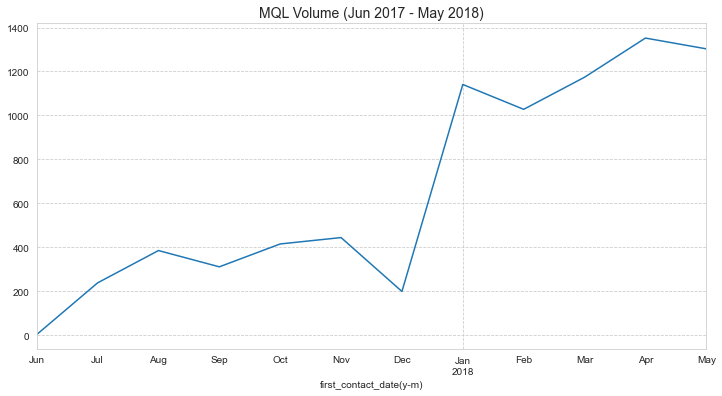

In [139]:
# Plot the monthly MQL volume
monthly_mql.plot.line(figsize=(12, 6))
plt.title('MQL Volume (Jun 2017 - May 2018)', fontsize=14)

# Since 2018, monthly MQL volume soared to above 1000

In [140]:
# Create 'channel-time series' table
mql_origin = pd.pivot_table(mql,index='origin',columns='first_contact_date(y-m)',values='mql_id',aggfunc='count',fill_value=0)
# Sort index from largest to smallest in volume
origin_list = mql.groupby('origin').mql_id.count().sort_values(ascending=False).index

#reindex the table
mql_origin = mql_origin.reindex(origin_list)
mql_origin

first_contact_date(y-m),2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
origin,,,,,,,,,,,,
organic_search,0,54,122,78,125,121,60,412,291,340,349,344
paid_search,0,56,79,64,100,70,35,170,212,262,272,266
social,0,12,45,56,52,95,39,162,156,139,325,269
unknown,1,35,70,39,53,63,25,151,156,186,166,154
direct_traffic,0,16,22,22,23,26,10,82,65,80,75,78
email,1,19,24,23,30,37,12,61,68,74,50,94
referral,0,8,16,12,8,20,9,41,34,38,45,53
other,0,12,3,9,8,3,1,39,16,22,26,11
display,1,19,2,5,5,6,5,11,18,16,19,11


##### Let's look at the volume for each acquisition channel

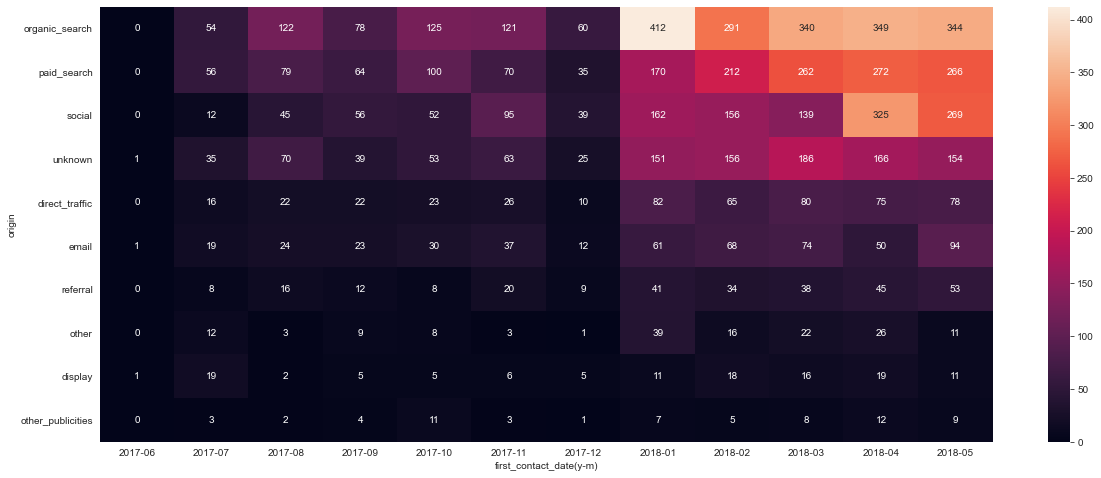

In [141]:
# Plot the monthly volume by channel
plt.figure(figsize=(20,8))
sns.heatmap(mql_origin, annot=True, fmt='g')

1. Paid search is the second biggest contributor to lead generation after 'organic search'.
2. The third one is 'social' which acquired MQLs more than or similar to 'paid search' since April 2018.
3. If the marginal cost of paid search increases, it would be possible to examine effectiveness of 'social' as an alternative.

### 1.2.9 Closed deals
After a MQL filled a form on landing page to sign up for seller, a Sales Development Representative(SDR) contacted the MQL and gathered more information about the lead. Then a Sales Representative(SR) consulted the MQL. So interaction between SDRs/SRs and MQLs can affect conversion from MQLs to sellers.
A MQL who finally signed up for seller is called a closed deal.

In [142]:
print(closed_deals.shape)
closed_deals.head(3)

(842, 14)


,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0


In [143]:
# Merge 'MQL' with 'closed deals'
# Merge by 'left' in order to evaluate conversion rate
mql_cd = pd.merge(mql,closed_deals,how='left',on='mql_id')
print(mql_cd.shape)
mql_cd.head(3)

(8000, 18)


,mql_id,first_contact_date,landing_page_id,origin,first_contact_date(y-m),seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,2018-02,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,2017-10,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,2018-03,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
# Add a column to distinguish signed MQLs from MQLs who left without signing up
mql_cd['seller_id(bool)'] = mql_cd['seller_id'].notna()
print(mql_cd.shape)
mql_cd[['seller_id', 'seller_id(bool)']].head()

(8000, 19)


,seller_id,seller_id(bool)
0,NaN,False
1,NaN,False
2,NaN,False
3,NaN,False
4,2c43fb513632d29b3b58df74816f1b06,True


In [145]:
# Compute monthly closed deals
monthly_cd = mql_cd.groupby('first_contact_date(y-m)')['seller_id(bool)'].sum()
monthly_cd.to_frame().T

first_contact_date(y-m),2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
seller_id(bool),0.0,2.0,9.0,7.0,14.0,18.0,11.0,152.0,149.0,167.0,183.0,130.0


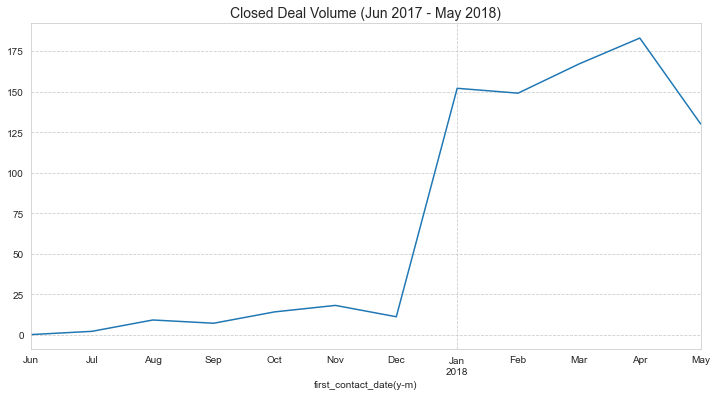

In [146]:
# Plot the monthly volume of closed deals
monthly_cd.plot.line(figsize=(12, 6))
plt.title('Closed Deal Volume (Jun 2017 - May 2018)', fontsize=14);

As we expected, the closed deals volume goes up and down with the MQL volume.

##### Conversion rate
Conversion rate means the percentage of MQLs who finally signed up for sellers (closed deals).

In [147]:
# Calculate monthly conversion rate
monthly_conversion = mql_cd.groupby(by='first_contact_date(y-m)')['seller_id(bool)'].agg(['count', 'sum'])
monthly_conversion['conversion_rate(%)'] = ((monthly_conversion['sum'] / monthly_conversion['count']) * 100).round(1)
monthly_conversion.T

first_contact_date(y-m),2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
count,4.0,239.0,386.0,312.0,416.0,445.0,200.0,1141.0,1028.0,1174.0,1352.0,1303.0
sum,0.0,2.0,9.0,7.0,14.0,18.0,11.0,152.0,149.0,167.0,183.0,130.0
conversion_rate(%),0.0,0.8,2.3,2.2,3.4,4.0,5.5,13.3,14.5,14.2,13.5,10.0


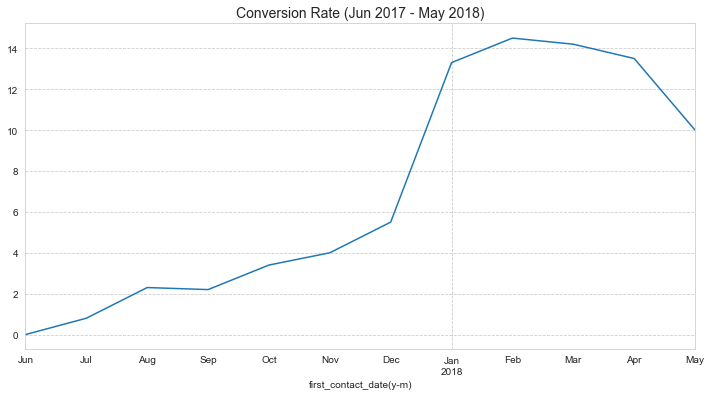

In [148]:
# Plot the monthly conversion rate
monthly_conversion['conversion_rate(%)'].plot.line(figsize=(12, 6))
plt.title('Conversion Rate (Jun 2017 - May 2018)', fontsize=14);

The conversion rate also increased with volume.

In [152]:
# Calculate sales length in days
mql_cd['sales_length(day)'] = np.ceil((mql_cd['won_date'] - mql_cd['first_contact_date']).dt.total_seconds()/ (60*60*24))

print(mql_cd.shape)
mql_cd[['first_contact_date', 'won_date', 'sales_length(day)']].head()

(8000, 20)


,first_contact_date,won_date,sales_length(day)
0,2018-02-01,NaT,NaN
1,2017-10-20,NaT,NaN
2,2018-03-22,NaT,NaN
3,2018-01-22,NaT,NaN
4,2018-02-21,2018-02-26 19:58:54,6.0


##### Sales Length
Sales length means period from first contact to signing up for seller.

In [153]:
# Separate sales length for each year
closed_deal = (mql_cd['seller_id'].notna())
lead_2017 = (mql_cd['first_contact_date'].dt.year.astype('str') == '2017')
lead_2018 = (mql_cd['first_contact_date'].dt.year.astype('str') == '2018')

sales_length_2017 = mql_cd[closed_deal & lead_2017]['sales_length(day)']
sales_length_2018 = mql_cd[closed_deal & lead_2018]['sales_length(day)']

sales_length_2017.head(3), sales_length_2018.head(3)

(67     268.0
 110    189.0
 239     55.0
 Name: sales_length(day), dtype: float64,
 4      6.0
 12    35.0
 14    64.0
 Name: sales_length(day), dtype: float64)

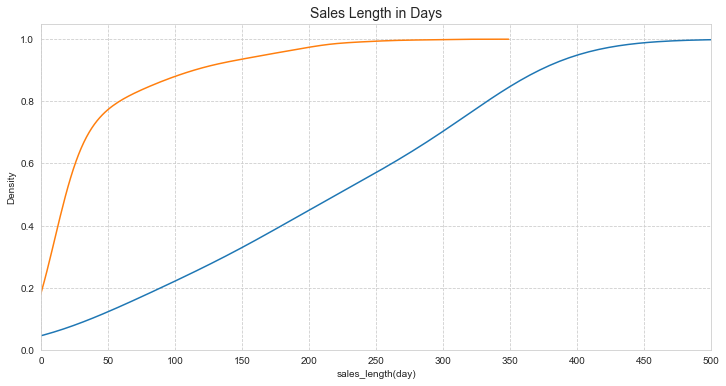

In [151]:
# Plot the sales length of each year
figure, ax = plt.subplots(figsize=(12,6))

sns.kdeplot(sales_length_2017,cumulative=True,label='2017 (Jun-Dec)',ax=ax)
sns.kdeplot(sales_length_2018,cumulative=True,label='2018 (Jan-May)',ax=ax)

ax.set_title('Sales Length in Days', fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xlim(0,500);

Sales length was dramatically shortened as well. While 13.1% of deals were closed within 50 days in 2017, 78.9% was closed in 2018. In a nutshell, both conversion rate and sales length were improved in 2018 against 2017.

### Now we want to see how the lead_behaviour_profile  in closed deals impacts the sales

'lead_behaviourprofile' is related to DISC personality test. Each type has the meaning as follows.

Behaviour_profile ----- DISC_profile ----- Description

Cat ----- Steadiness ----- Person places emphasis on cooperation, sincerity, dependability

Eagle ----- Influence ----- Person places emphasis on influencing or persuading others, openness, relationships

Wolf ----- Conscientiousness ----- Person places emphasis on quality and accuracy, expertise, competency

Shark -----  Dominance ----- Person places emphasis on accomplishing results, the bottom line, confidence

##### Reference:

https://www.discprofile.com/what-is-disc

In [161]:
closed_deals.head(3)

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0


In [160]:
#get the lead_behaviour_profile from closed deals
#we make a copy to avoid modification on orginal data
cd_profile = closed_deals[closed_deals.lead_behaviour_profile.notna()].copy()
print(cd_profile.shape)
cd_profile.lead_behaviour_profile.value_counts()

(665, 14)


cat            407
eagle          123
wolf            95
shark           24
cat, wolf        8
eagle, cat       3
eagle, wolf      3
shark, cat       1
shark, wolf      1
Name: lead_behaviour_profile, dtype: int64

In [163]:
#most of the lead are not mixed type, so we combine the mixed type leads into 'mixed'
profile_list = ['cat', 'eagle', 'wolf', 'shark']

cd_profile['lead_behaviour_profile(upd)'] = cd_profile.lead_behaviour_profile.map(lambda profile: profile if profile in profile_list else 'mixed')

print(cd_profile.shape)
cd_profile['lead_behaviour_profile(upd)'].value_counts()

(665, 15)


cat      407
eagle    123
wolf      95
shark     24
mixed     16
Name: lead_behaviour_profile(upd), dtype: int64

In [166]:
# create 'profile - lead type' table
cols = cd_profile.lead_type.value_counts().index
index = cd_profile['lead_behaviour_profile(upd)'].value_counts().index
profile_leadType = pd.pivot_table(cd_profile, index = 'lead_behaviour_profile(upd)',columns = 'lead_type',values = 'seller_id',aggfunc = 'count',fill_value = 0)
profile_leadType = profile_leadType.reindex(index)[cols]
profile_leadType

lead_type,online_medium,online_big,industry,offline,online_small,online_beginner,online_top,other
cat,157,72,49,49,37,31,8,2
eagle,46,11,25,22,12,6,1,0
wolf,45,16,14,9,6,5,0,0
shark,9,4,4,5,1,0,1,0
mixed,8,3,2,1,1,0,0,1


In [168]:
# Create 'profile - business type' table
cols = cd_profile['business_type'].value_counts().index
index = cd_profile['lead_behaviour_profile(upd)'].value_counts().index

profile_businessType = pd.pivot_table(cd_profile,index='lead_behaviour_profile(upd)',columns='business_type',values='seller_id',aggfunc='count',fill_value=0)

profile_businessType = profile_businessType.reindex(index)[cols]
profile_businessType


business_type,reseller,manufacturer,other
cat,284,116,2
eagle,83,37,0
wolf,69,26,0
shark,16,7,0
mixed,13,2,1


In [169]:
# Create 'profile - business segment' table
cols = cd_profile['business_segment'].value_counts().index
index = cd_profile['lead_behaviour_profile(upd)'].value_counts().index

profile_segment = pd.pivot_table(cd_profile,
                                 index='lead_behaviour_profile(upd)',
                                 columns='business_segment',
                                 values='seller_id',
                                 aggfunc='count',
                                 fill_value=0)

profile_segment = profile_segment.reindex(index)[cols]
profile_segment

business_segment,home_decor,health_beauty,car_accessories,household_utilities,construction_tools_house_garden,audio_video_electronics,computers,pet,sports_leisure,food_supplement,...,watches,books,jewerly,gifts,other,party,games_consoles,perfume,air_conditioning,religious
cat,51,43,41,32,35,38,16,15,17,13,...,2,2,3,3,2,2,1,1,0,1
eagle,11,13,12,12,11,8,3,4,4,5,...,2,0,0,1,0,1,0,1,0,0
wolf,14,8,9,9,7,8,5,4,1,2,...,1,4,1,0,0,0,0,0,1,0
shark,4,5,2,3,4,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
mixed,0,1,2,1,0,0,2,0,0,0,...,1,0,0,0,1,0,1,0,0,0


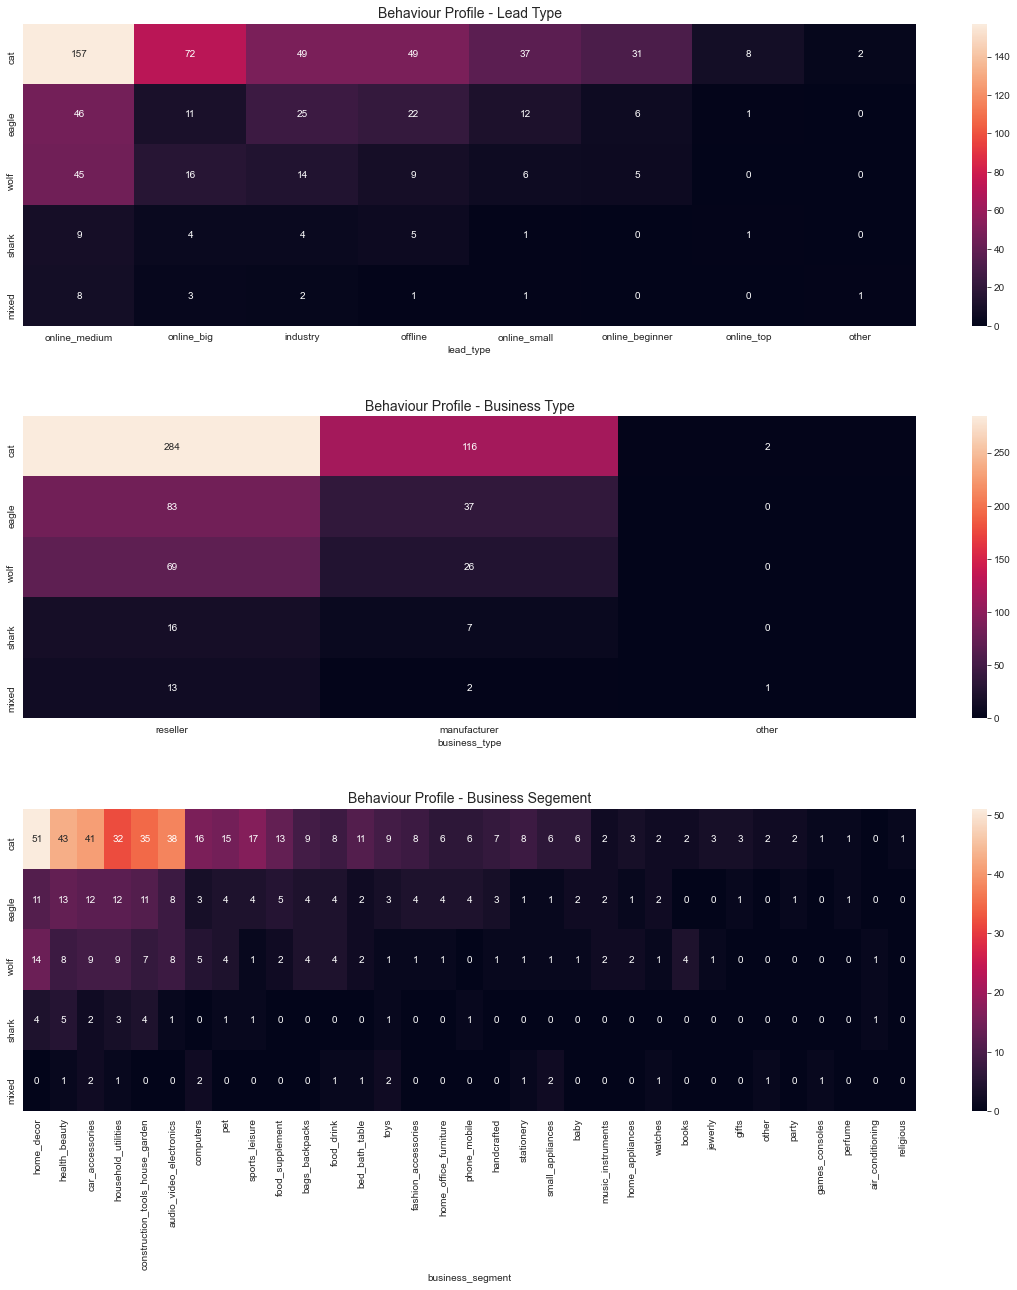

In [170]:
# Plot the above three tables
figure, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,20))
figure.subplots_adjust(hspace=0.3)

sns.heatmap(profile_leadType,
            annot=True,
            fmt='g',
            ax=ax1)
sns.heatmap(profile_businessType,
            annot=True,
            fmt='g',
            ax=ax2)
sns.heatmap(profile_segment,
            annot=True,
            fmt='g',
            ax=ax3)

ax1.set_title('Behaviour Profile - Lead Type', fontsize=14)
ax2.set_title('Behaviour Profile - Business Type', fontsize=14)
ax3.set_title('Behaviour Profile - Business Segement', fontsize=14);

Closed deals are won in order of cat, eagle, wolf and shark based on descending volume in all three dimensions.

In consideration of business context, it might make sense that conversion rate of wolf (accuracy-focused) or shark (result-focused) was lower than cat (cooperation-focused) or eagle (relationship-focused).

If so, sales performance could be improved by matching SDRs/SRs with MQLs properly.

#### SDR/SR Performance by Behaviour Profile

In [171]:
# Create 'profile-SDR' table
cols = cd_profile['sdr_id'].value_counts().index
index = cd_profile['lead_behaviour_profile(upd)'].value_counts().index

profile_sdr = pd.pivot_table(cd_profile,
                             index='lead_behaviour_profile(upd)',
                             columns='sdr_id',
                             values='seller_id',
                             aggfunc='count',
                             fill_value=0)

profile_sdr = profile_sdr.reindex(index)[cols] # Sort SDR in descending order of volume 
profile_sdr

sdr_id,4b339f9567d060bcea4f5136b9f5949e,9d12ef1a7eca3ec58c545c678af7869c,a8387c01a09e99ce014107505b92388c,9e4d1098a3b0f5da39b0bc48f9876645,068066e24f0c643eb1d089c7dd20cd73,370c9f455f93a9a96cbe9bea48e70033,f42a2bd194f7802ab052a815c8de65b7,09285259593c61296eef10c734121d5b,34d40cdaf94010a1d05b0d6212f9e909,56bf83c4bb35763a51c2baab501b4c67,...,2b63542749aa9caf15f21816da1db341,b34f6eba10f46bf9a657a01c108a8284,0cdad77786224a7cefea567b8c75c3c1,6aa3b86a83d784b05f0e37e26b20860d,5b7ce8c2b0fe4c2f52a0763046914ef4,19f3cd308f1455b3fa09a282e0d496f4,b1b3ec93fc27a19fdb1c1b1fc997776a,e4a6222cdb5b34375400904f03d8e6a5,282f16e20d50cb18d05182e80f6b9dd6,084b6fbb10729ed4da8c3d3f5a3ae7c9
cat,52,35,50,37,43,26,23,25,30,24,...,2,1,2,1,1,1,0,0,0,1
eagle,9,22,4,10,3,14,7,8,8,16,...,0,0,0,0,0,0,0,0,0,0
wolf,42,6,3,3,3,7,7,7,1,0,...,1,0,0,0,0,0,0,0,1,0
shark,8,0,0,3,2,2,1,2,2,0,...,0,1,0,1,0,0,0,0,0,0
mixed,1,1,0,0,0,1,4,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [172]:
# Create 'profile-SR' table
cols = cd_profile['sr_id'].value_counts().index
index = cd_profile['lead_behaviour_profile(upd)'].value_counts().index

profile_sr = pd.pivot_table(cd_profile,
                            index='lead_behaviour_profile(upd)',
                            columns='sr_id',
                            values='seller_id',
                            aggfunc='count',
                            fill_value=0)

profile_sr = profile_sr.reindex(index)[cols] # Sort SR in descending order of volume
profile_sr

sr_id,4ef15afb4b2723d8f3d81e51ec7afefe,85fc447d336637ba1df43e793199fbc8,6565aa9ce3178a5caf6171827af3a9ba,d3d1e91a157ea7f90548eef82f1955e3,2695de1affa7750089c0455f8ce27021,de63de0d10a6012430098db33c679b0b,495d4e95a8cf8bbf8b432b612a2aa328,fbf4aef3f6915dc0c3c97d6812522f6a,c638112b43f1d1b86dcabb0da720c901,068066e24f0c643eb1d089c7dd20cd73,...,060c0a26f19f4d66b42e0d8796688490,56bf83c4bb35763a51c2baab501b4c67,9ae085775a198122c5586fa830ff7f2b,34d40cdaf94010a1d05b0d6212f9e909,4b339f9567d060bcea4f5136b9f5949e,9749123c950bf8363ace42cb1c2d0815,9d12ef1a7eca3ec58c545c678af7869c,6aa3b86a83d784b05f0e37e26b20860d,b90f87164b5f8c2cfa5c8572834dbe3f,0a0fb2b07d841f84fb6714e35c723075
cat,58,41,31,28,34,37,30,30,17,11,...,15,17,12,3,7,2,3,0,0,1
eagle,23,7,13,12,9,7,6,9,5,7,...,2,2,4,4,0,0,0,0,1,0
wolf,12,11,11,11,6,5,7,2,3,4,...,6,2,5,0,2,4,1,0,0,0
shark,0,4,0,2,2,4,2,2,0,1,...,1,2,1,0,0,1,0,0,0,0
mixed,2,0,0,1,2,0,1,0,0,2,...,0,0,1,3,0,0,2,1,0,0


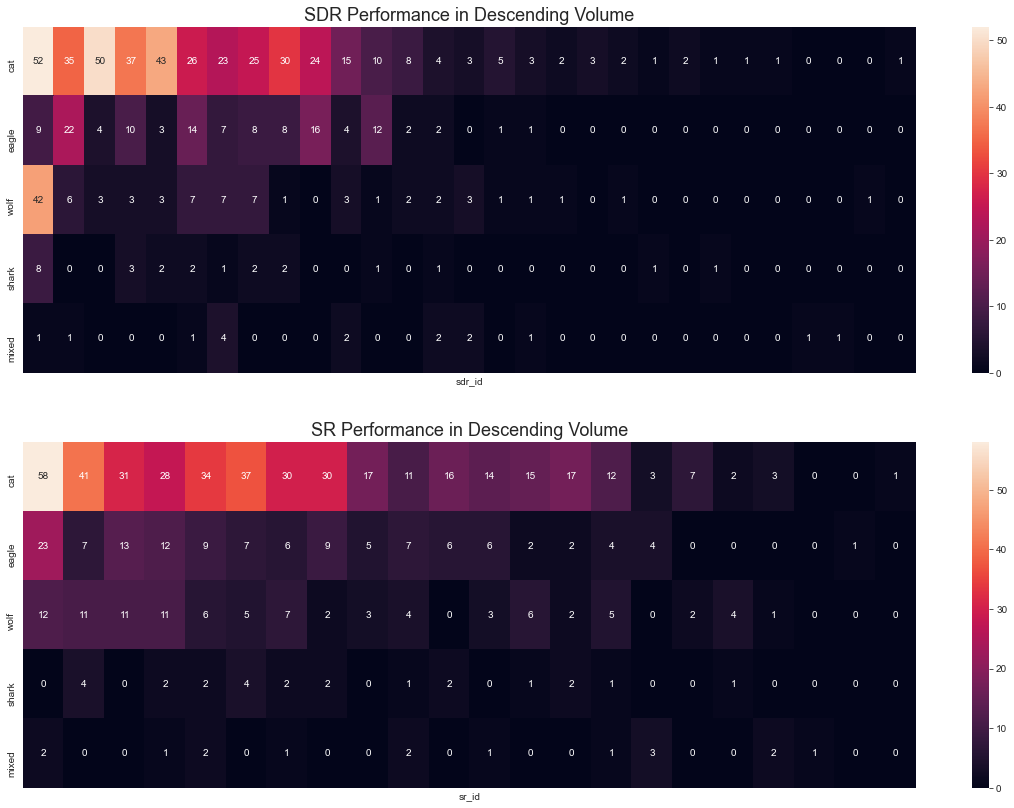

In [174]:
#Plot two tables
figure, (ax1,ax2) = plt.subplots(2, 1, figsize=(20,14))
figure.subplots_adjust(hspace=0.2)

sns.heatmap(profile_sdr,
            annot=True,
            fmt='g',
            ax=ax1)
sns.heatmap(profile_sr,
            annot=True,
            fmt='g',
            ax=ax2)

ax1.set_title('SDR Performance in Descending Volume', fontsize=14)
ax2.set_title('SR Performance in Descending Volume', fontsize=14)
ax1.set_xticks([])
ax2.set_xticks([]);

#### SDR:
the 1st, 3rd and 5th sdr are good at handling cat leads, 2nd and 10th sdr are specialized in eagle.
the 1st sdr also good at deal with wolf type leads, but he/she is not eminent in dealing with eagle.

So, train the top sdrs expertise in handling the cat, eagle or wolf can improve team performance since sdr is the first contact point of MQL and they do not know the lead's behaviour profile yet.

As for shark, the whole team need more information and resources about this type of leads to communicate better.

#### SR
the 1st sr has matchless skills in managing both cat and eagle.
first four sr did a better job on handlng wolf than the others.
SRs are also bad at dealing with shark.

1st sr may need to share experience in dealing with eagle with team since he/she performed much better than the others.

Same as SDR, external knowledge sor=urces can be a way to boost performance.


### 1.3 Combine the tables to observe closely on revenve related performances
At this part of EDA, we mainly used closed deals, items, orders, products and also product category translation files.

In [175]:
#make a copy of all tables we are going to use
cd = closed_deals.copy()
order_items = items.copy()
order = orders.copy()
product = products.copy()
product_translation = product_category_trans.copy()

In [176]:
print(cd.shape)
print(order_items.shape)
print(order.shape)
print(product.shape)
print(product_translation.shape)

(842, 14)
(112650, 7)
(99441, 8)
(32951, 9)
(71, 2)


In [178]:
#merge all tables
merged_data = pd.merge(cd, order_items, how = 'inner', on = 'seller_id')
merged_data = pd.merge(merged_data, order, how = 'inner', on = 'order_id')
merged_data = pd.merge(merged_data, product, how = 'inner', on = 'product_id')
merged_data = pd.merge(merged_data, product_translation, how = 'left', on = 'product_category_name')
merged_data.shape

(5044, 36)

In [179]:
#extract all delivered orders
data = merged_data[merged_data.order_status=='delivered']

In [185]:
data.order_purchase_timestamp

0       2018-06-20 21:40:18
1       2018-07-23 20:50:50
2       2018-06-21 15:42:55
3       2018-07-24 17:25:33
4       2018-07-15 21:52:17
               ...         
5039    2018-07-25 08:15:09
5040    2018-08-08 19:46:37
5041    2018-07-17 18:27:15
5042    2018-08-16 20:58:56
5043    2018-08-11 19:27:59
Name: order_purchase_timestamp, Length: 4984, dtype: object

In [188]:
#convert object to datetime
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'] )
# add a 'year-month' column
data['order_purchase_timestamp(y-m)'] = data['order_purchase_timestamp'].dt.to_period('M')
print(data.shape)
data.head()

(4984, 37)


<ipython-input-188-e3017158793f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'] )
<ipython-input-188-e3017158793f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_purchase_timestamp(y-m)'] = data['order_purchase_timestamp'].dt.to_period('M')


,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_purchase_timestamp(y-m)
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,...,pet_shop,56.0,1538.0,2.0,625.0,23.0,17.0,19.0,pet_shop,2018-06
1,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,...,ferramentas_jardim,25.0,432.0,1.0,2825.0,29.0,29.0,29.0,garden_tools,2018-07
2,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,...,pet_shop,53.0,1494.0,2.0,900.0,26.0,19.0,23.0,pet_shop,2018-06
3,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,...,sinalizacao_e_seguranca,60.0,1170.0,1.0,450.0,16.0,5.0,16.0,signaling_and_security,2018-07
4,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,...,sinalizacao_e_seguranca,60.0,1170.0,1.0,450.0,16.0,5.0,16.0,signaling_and_security,2018-07


#### Monthly Revenues
Here we are going to watch the revenues by the following dorections:
1. Business segment
2. Product category
3. Seller

##### Business segment revenues

In [192]:
#we first sort the columns in a descending way
cols = data.groupby(by = 'business_segment').price.sum().sort_values(ascending = False).index

monthly_segment_revenue = data.groupby(['order_purchase_timestamp(y-m)','business_segment']).price.sum().unstack(level = 1, fill_value = 0)
monthly_segment_revenue = monthly_segment_revenue[cols]
monthly_segment_revenue

business_segment,watches,health_beauty,household_utilities,audio_video_electronics,small_appliances,home_decor,pet,construction_tools_house_garden,car_accessories,home_appliances,...,books,music_instruments,toys,phone_mobile,food_drink,air_conditioning,gifts,handcrafted,games_consoles,party
order_purchase_timestamp(y-m),,,,,,,,,,,,,,,,,,,,,
2018-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00
2018-02,5935.46,28.00,443.60,20.00,140.00,1042.50,211.96,677.56,178.90,0.00,...,0.00,1447.90,234.69,0.00,0.00,0.0,0.00,0.0,0.0,0.00
2018-03,27439.45,567.50,2233.49,2842.87,12620.00,531.50,377.86,1154.44,347.00,145.97,...,19.90,179.90,238.10,642.00,14.90,0.0,0.00,0.0,0.0,0.00
2018-04,21918.00,6793.63,5008.94,3074.49,12529.90,2857.34,4586.34,2611.66,4266.00,869.98,...,344.45,439.79,923.06,1189.90,223.50,0.0,189.00,0.0,0.0,0.00
2018-05,31286.81,17073.44,10153.85,9813.11,14447.50,6134.17,3316.38,6499.96,3451.86,435.00,...,3023.27,494.86,670.41,152.90,413.80,0.0,0.00,0.0,0.0,0.00
2018-06,11547.88,25298.46,10497.65,10067.49,3909.80,8414.03,6292.87,4591.75,5414.06,2494.49,...,1020.19,973.59,1116.54,1247.59,302.40,282.0,0.00,93.8,0.0,0.00
2018-07,7393.44,20035.20,11568.15,12017.70,1187.20,10980.97,9526.63,8485.62,6637.60,16278.83,...,1554.74,1189.70,1153.53,449.70,1148.49,278.0,482.98,93.8,438.0,0.00
2018-08,10380.04,19128.11,11375.19,11587.78,2840.47,13848.82,16186.79,7986.08,9710.56,6016.90,...,980.34,1113.90,1220.53,599.30,1599.84,2090.0,339.29,688.3,219.0,388.98


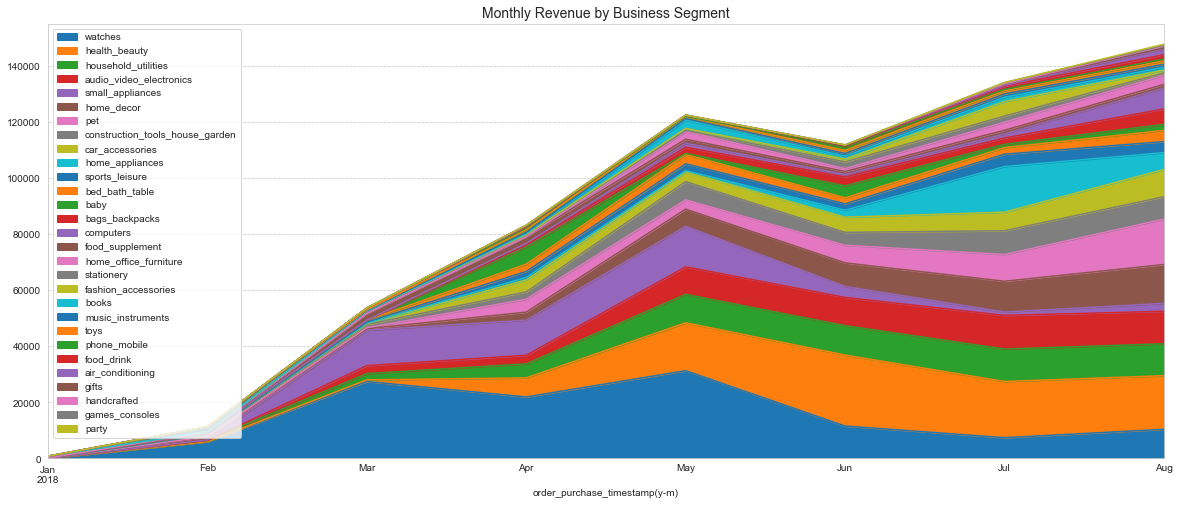

In [196]:
#plot the monthly revenues by segment
monthly_segment_revenue.plot.area(figsize = (20,8))
plt.title('Monthly Revenue by Business Segment', fontsize  =14)
plt.legend()

In [204]:
total = round(monthly_segment_revenue.sum().sum(),0)
print(f'Total revenues across 29 segments came in at {total} in the first eight months of 2018.')

Total revenues across 29 segments came in at 664858.0 in the first eight months of 2018.


In [205]:
watches_total = round(monthly_segment_revenue.watches.sum(),0)
watches_revenue_pecen = round(watches_total/total*100,2)
print(f'The biggest segment was watches, which generated {watches_revenue_pecen}% of total revenues {watches_total}.')

The biggest segment was watches, which generated 17.43% of total revenues 115901.0.


##### Since we observed that the watches revenue is the highest, let's take a look at each product category's performance of watched revenus

In [206]:
# Create watches segment dataframe
watches = data[data.business_segment == 'watches']
watches.shape

(586, 37)

In [207]:
#create monthly revenues by product category
cols = watches.groupby('product_category_name_english').price.sum().sort_values(ascending =False).index
monthly_revenue_category = watches.groupby(['order_purchase_timestamp(y-m)','product_category_name_english']).price.sum().unstack(level = 1, fill_value = 0)
monthly_revenue_category = monthly_revenue_category[cols]
monthly_revenue_category

product_category_name_english,watches_gifts,audio,electronics,sports_leisure,cool_stuff,market_place,perfumery
order_purchase_timestamp(y-m),,,,,,,
2018-02,5065.36,590.00,280.10,0.0,0.0,0.0,0.0
2018-03,19106.69,7547.76,240.00,545.0,0.0,0.0,0.0
2018-04,15588.14,5609.89,719.97,0.0,0.0,0.0,0.0
2018-05,29070.81,2216.00,0.00,0.0,0.0,0.0,0.0
2018-06,9727.88,1172.00,0.00,468.0,180.0,0.0,0.0
2018-07,5747.44,876.00,370.00,0.0,180.0,0.0,220.0
2018-08,8077.86,550.00,1464.58,0.0,0.0,287.6,0.0


Text(0.5, 1.0, 'Monthly Revenues by Product Category of Watches')

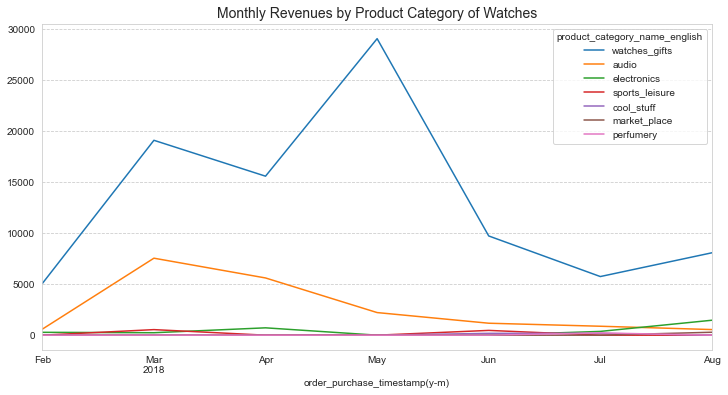

In [228]:
#plot the monthly revenues by category
monthly_revenue_category.plot.line(figsize=(12,6))
plt.title('Monthly Revenues by Product Category of Watches', fontsize=14)

In [212]:
# we notice watches_gift takes most part of the revenue
total = round(monthly_revenue_category.sum().sum(),0)
watches_gifts_total = round(monthly_revenue_category.watches_gifts.sum(),0)
percent = round(watches_gifts_total/total*100,2)

print(f'watches_gifts generated {watches_gifts_total} revenue of total {total}, which is {percent}% of total revenue of segment')

watches_gifts generated 92384.0 revenue of total 115901.0, which is 79.71% of total revenue of segment


##### Revenue by sellers

In [217]:
#create category-seller table
index = watches.groupby('product_category_name_english').price.sum().sort_values().index
seller_category_revenue = watches.groupby(['seller_id','product_category_name_english']).price.sum().unstack(level = 0, fill_value = 0)
seller_category_revenue = seller_category_revenue.reindex(index)
seller_category_revenue

seller_id,7d13fca15225358621be4086e1eb0964,bce6a5ecf98e99fd2a8868b15c51f04b
product_category_name_english,,
perfumery,220.00,0.0
market_place,287.60,0.0
cool_stuff,360.00,0.0
sports_leisure,1013.00,0.0
electronics,3074.65,0.0
audio,18561.65,0.0
watches_gifts,88919.28,3464.9


In [218]:
seller_category_revenue.shape

(7, 2)

Text(0.5, 1.0, 'Watches Revenue by Seller')

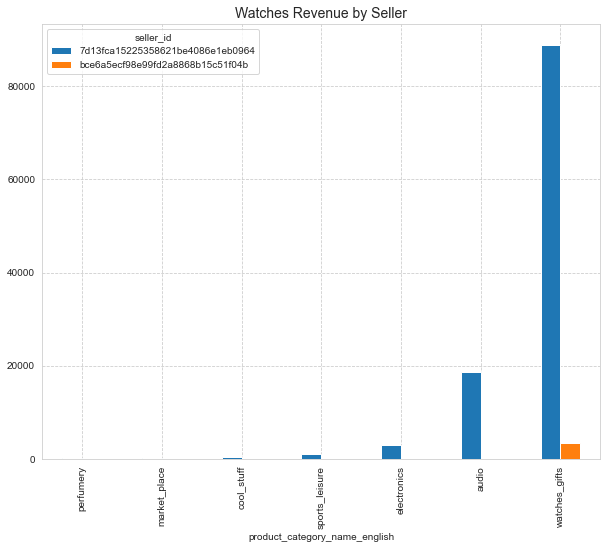

In [222]:
seller_category_revenue.plot(kind = 'bar', figsize = (10,8))
plt.title('Watches Revenue by Seller', fontsize=14)

In [227]:
firstseller_total = seller_category_revenue.iloc[:,0].sum()
total = seller_category_revenue.sum().sum()
percent = round(firstseller_total/total*100,2)
print(f'The most profitable segment watches only has two sellers, and the first seller generated {percent}% of segment revenue')

The most profitable segment watches only has two sellers, and the first seller generated 97.01% of segment revenue


So far we've done with EDA part. We have looked at wach tables basic information. Knowing the top 10 states and cities of customers and sellers number.Take a look at the specific subject: items. payments and orders. Visulized the evolution of e-commerce in Brazil. We digged into closed deals table to know how leads type, leads behaviour and business segment influence the closed deals. At last we combine some of tables to look at the revenues in details. 

Now, based on what've observed from first step's eda, we are going to handling the missing data, merge tables, select variables to make predictions on revenue, review score.